In [1]:
import os
import glob
import pydicom
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cv2
import numpy as np
import matplotlib.patches as patches
from nms import nms
from PIL import Image

In [3]:
t1w_files = glob.glob('Z:/Lisa/PARISK/PARISK-MRI-Carotid/MUMC*/MASSExport/T1w_*.dcm')
t1c_files = glob.glob('Z:/Lisa/PARISK/PARISK-MRI-Carotid/MUMC*/MASSExport/contrastT1w*.dcm')
t2w_files = glob.glob('Z:/Lisa/PARISK/PARISK-MRI-Carotid/MUMC*/MASSExport/T2w*.dcm')
tof_files = glob.glob('Z:/Lisa/PARISK/PARISK-MRI-Carotid/MUMC*/MASSExport/3DTOF*.dcm')
tfe_files = glob.glob('Z:/Lisa/PARISK/PARISK-MRI-Carotid/MUMC*/MASSExport/TFE*.dcm')
con_files = glob.glob('Z:/Lisa/PARISK/PARISK-MRI-Carotid/MUMC*/contours/con_*.dcm')

In [4]:
len(t1w_files), len(t1c_files), len(t2w_files), len(tof_files), len(tfe_files),

(1098, 1098, 1098, 1098, 1098)

In [7]:
def parse_filename(filename):
    n_id = filename.split(os.sep)[1]
    n_sl = filename.split(os.sep)[-1][4:8]
    return n_id, n_sl

In [5]:
i = 11

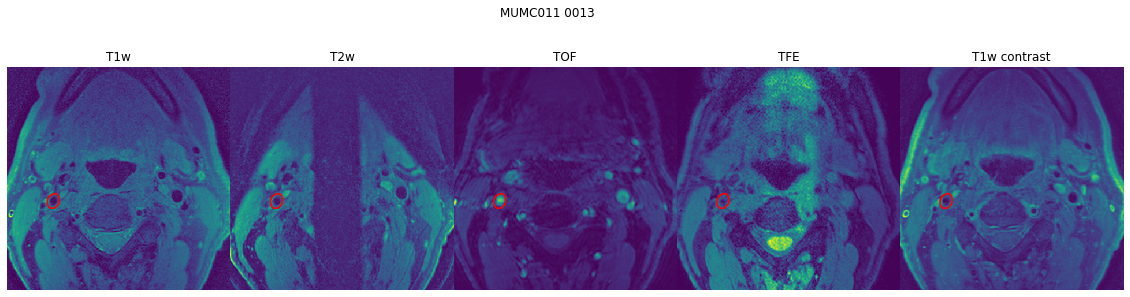

In [19]:
t1w_file = t1w_files[i]
tof_file = tof_files[i]
con_file = con_files[i]
t2w_file = t2w_files[i]
t1c_file = t1c_files[i]
tfe_file = tfe_files[i]
    
patient_number, slice_number = parse_filename(t1w_file)
    
t1w_dcm = pydicom.read_file(t1w_file, force = True)
t1w_dcm.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
t1w = t1w_dcm.pixel_array

t2w_dcm = pydicom.read_file(t2w_file, force = True)
t2w_dcm.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
t2w = t2w_dcm.pixel_array

t1c_dcm = pydicom.read_file(t1c_file, force = True)
t1c_dcm.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
t1c = t1c_dcm.pixel_array

tfe_dcm = pydicom.read_file(tfe_file, force = True)
tfe_dcm.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
tfe = tfe_dcm.pixel_array

tof_dcm = pydicom.read_file(tof_file, force = True)
tof_dcm.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
tof = tof_dcm.pixel_array

con_dcm = pydicom.read_file(con_file, force = True)
con_dcm.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
con = con_dcm.pixel_array

fig, ax = plt.subplots(figsize = (20,5)) 

plt.subplot(1, 5, 1)
plt.imshow(t1w[70:-70, 70:-70])
plt.contour(con[70:-70, 70:-70], levels=[0.5], colors='r')
plt.axis('Off')
plt.title('T1w')

plt.subplot(1, 5, 2)
plt.imshow(t2w[70:-70, 70:-70])
plt.contour(con[70:-70, 70:-70], levels=[0.5], colors='r')
plt.axis('Off')
plt.title('T2w')

plt.subplot(1, 5, 3)
plt.imshow(tof[70:-70, 70:-70])
plt.contour(con[70:-70, 70:-70], levels=[0.5], colors='r')
plt.axis('Off')
plt.title('TOF')

plt.subplot(1, 5, 4)
plt.imshow(tfe[70:-70, 70:-70])
plt.contour(con[70:-70, 70:-70], levels=[0.5], colors='r')
plt.axis('Off')
plt.title('TFE')

plt.subplot(1, 5, 5)
plt.imshow(t1c[70:-70, 70:-70])
plt.contour(con[70:-70, 70:-70], levels=[0.5], colors='r')
plt.axis('Off')
plt.title('T1w contrast')

plt.suptitle(patient_number + ' ' + slice_number)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [20]:
t1w.shape

(528, 528)

In [22]:
t1w_min = np.min(t1w)
t1w_max = np.max(t1w)
t1w_res = (np.round((t1w-t1w_min)/(t1w_max-t1w_min)*255)).astype(np.uint8)

t2w_min = np.min(t2w)
t2w_max = np.max(t2w)
t2w_res = (np.round((t2w-t2w_min)/(t2w_max-t2w_min)*255)).astype(np.uint8)

t1c_min = np.min(t1c)
t1c_max = np.max(t1c)
t1c_res = (np.round((t1c-t1c_min)/(t1c_max-t1c_min)*255)).astype(np.uint8)

tof_min = np.min(tof)
tof_max = np.max(tof)
tof_res = (np.round((tof-tof_min)/(tof_max-tof_min)*255)).astype(np.uint8)

tfe_min = np.min(tfe)
tfe_max = np.max(tfe)
tfe_res = (np.round((tfe-tfe_min)/(tfe_max-tfe_min)*255)).astype(np.uint8)

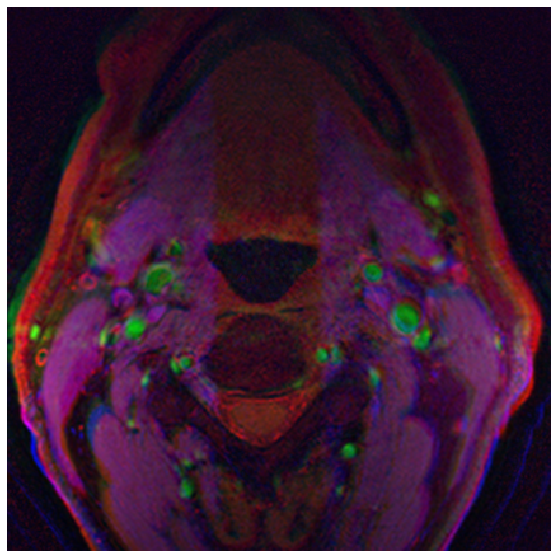

In [27]:
rgbArray = np.zeros((t1w.shape[0],t1w.shape[1],3), 'uint8')
rgbArray[..., 0] = t1w_res
rgbArray[..., 1] = tof_res
rgbArray[..., 2] = t2w_res
img = Image.fromarray(rgbArray[50:-50, 50:-50, :])
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('Off')
plt.show()

In [29]:
np.where(con>0)[0]

array([291, 291, 291, 291, 292, 292, 292, 292, 292, 292, 292, 292, 292,
       293, 293, 293, 293, 293, 293, 293, 293, 293, 293, 293, 293, 294,
       294, 294, 294, 294, 294, 294, 294, 294, 294, 294, 294, 294, 294,
       295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295,
       295, 295, 295, 296, 296, 296, 296, 296, 296, 296, 296, 296, 296,
       296, 296, 296, 296, 296, 296, 296, 297, 297, 297, 297, 297, 297,
       297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 298,
       298, 298, 298, 298, 298, 298, 298, 298, 298, 298, 298, 298, 298,
       298, 298, 298, 298, 298, 299, 299, 299, 299, 299, 299, 299, 299,
       299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 300, 300,
       300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
       300, 300, 300, 300, 301, 301, 301, 301, 301, 301, 301, 301, 301,
       301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 302, 302,
       302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 30

In [30]:
x_min = np.min(np.where(con>0)[0])
y_min = np.min(np.where(con>0)[1])

x_max = np.max(np.where(con>0)[0])
y_max = np.max(np.where(con>0)[1])

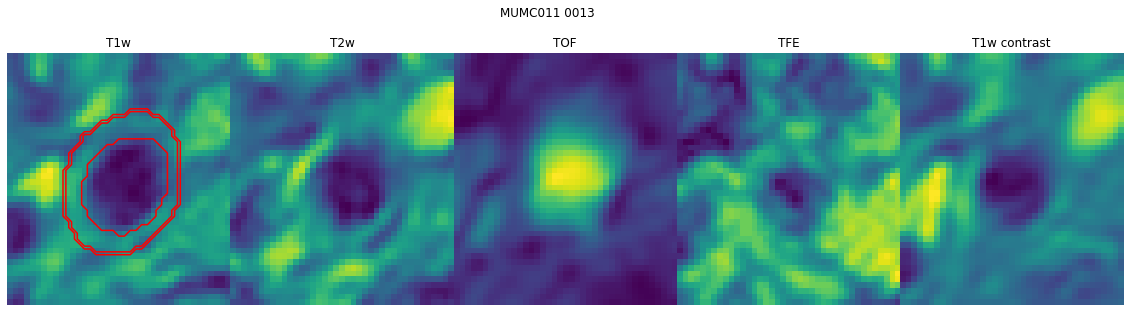

In [35]:
fig, ax = plt.subplots(figsize = (20,5)) 

plt.subplot(1, 5, 1)
plt.imshow(t1w[x_min-10:x_max+10, y_min-10:y_max+10])
plt.contour(con[x_min-10:x_max+10, y_min-10:y_max+10], levels=[0.5, 1.5], colors='r')
plt.axis('Off')
plt.title('T1w')

plt.subplot(1, 5, 2)
plt.imshow(t2w[x_min-10:x_max+10, y_min-10:y_max+10])
plt.contour(con[x_min-10:x_max+10, y_min-10:y_max+10], levels=[0.5, 1.5], colors='r')
plt.axis('Off')
plt.title('T2w')

plt.subplot(1, 5, 3)
plt.imshow(tof[x_min-10:x_max+10, y_min-10:y_max+10])
plt.contour(con[x_min-10:x_max+10, y_min-10:y_max+10], levels=[0.5, 1.5], colors='r')
plt.axis('Off')
plt.title('TOF')

plt.subplot(1, 5, 4)
plt.imshow(tfe[x_min-10:x_max+10, y_min-10:y_max+10])
plt.contour(con[x_min-10:x_max+10, y_min-10:y_max+10], levels=[0.5, 1.5], colors='r')
plt.axis('Off')
plt.title('TFE')

plt.subplot(1, 5, 5)
plt.imshow(t1c[x_min-10:x_max+10, y_min-10:y_max+10])
plt.contour(con[x_min-10:x_max+10, y_min-10:y_max+10], levels=[0.5, 1.5], colors='r')
plt.axis('Off')
plt.title('T1w contrast')

plt.suptitle(patient_number + ' ' + slice_number)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

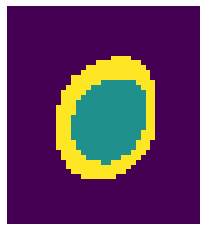

In [34]:
plt.imshow(con[x_min-10:x_max+10, y_min-10:y_max+10])
plt.axis('Off')
plt.show()

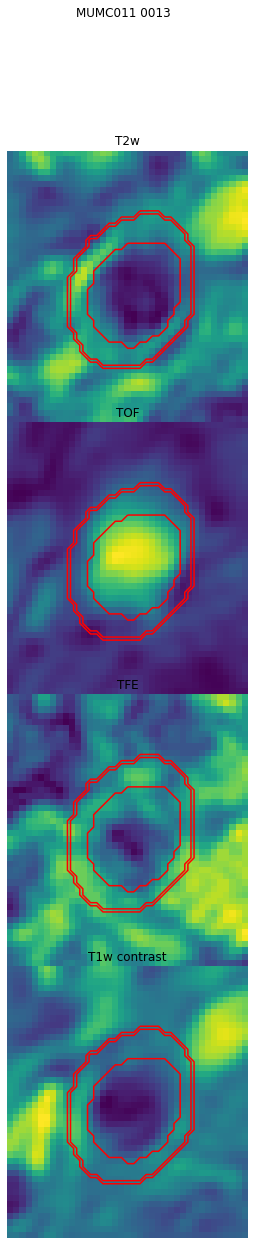

In [36]:
fig, ax = plt.subplots(figsize = (5, 20)) 


plt.subplot(4, 1, 1)
plt.imshow(t2w[x_min-10:x_max+10, y_min-10:y_max+10])
plt.contour(con[x_min-10:x_max+10, y_min-10:y_max+10], levels=[0.5, 1.5], colors='r')
plt.axis('Off')
plt.title('T2w')

plt.subplot(4, 1, 2)
plt.imshow(tof[x_min-10:x_max+10, y_min-10:y_max+10])
plt.contour(con[x_min-10:x_max+10, y_min-10:y_max+10], levels=[0.5, 1.5], colors='r')
plt.axis('Off')
plt.title('TOF')

plt.subplot(4, 1, 3)
plt.imshow(tfe[x_min-10:x_max+10, y_min-10:y_max+10])
plt.contour(con[x_min-10:x_max+10, y_min-10:y_max+10], levels=[0.5, 1.5], colors='r')
plt.axis('Off')
plt.title('TFE')

plt.subplot(4, 1, 4)
plt.imshow(t1c[x_min-10:x_max+10, y_min-10:y_max+10])
plt.contour(con[x_min-10:x_max+10, y_min-10:y_max+10], levels=[0.5, 1.5], colors='r')
plt.axis('Off')
plt.title('T1w contrast')

plt.suptitle(patient_number + ' ' + slice_number)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()